# 2.2 Methods to Visualize the Relationship Between Two Categorical Variables
The previous section visualized data when we have one categorical variable. But we might be interested in the relationship between two categorical variables. Does one variable perhaps influence the other? We'll introduce two visualizations here: a contingency table and a stacked column chart. A tabular method and a graphical method, that help us understand the relations between categorical variables.

## A Contingency Table
Suppose we expand the personality test data discussed in Section 2.1 so we also have the sex of employees.

In [1]:
import pandas as pd
import numpy as np

# Read data.
myers_briggs2 = pd.read_csv('Myers_Briggs2.csv', index_col=False)
myers_briggs2.head(5)

,Employee,Personality,Sex
0,1,Diplomat,Female
1,2,Diplomat,Female
2,3,Explorer,Male
3,4,Diplomat,Female
4,5,Diplomat,Female


Suppose we want to understand the relationship between sex and Myers-Briggs results. We can use a contingency table to summarize this data!

In [2]:
# Contingency table.
cont_tab = pd.crosstab(myers_briggs2['Sex'],
                       myers_briggs2['Personality'], margins=True)
cont_tab

Personality,Analyst,Diplomat,Explorer,Sentinel,All
Sex,,,,,
Female,55,164,194,79,492
Male,61,160,210,77,508
All,116,324,404,156,1000


In [3]:
cont_tab.columns[:4].tolist()

['Analyst', 'Diplomat', 'Explorer', 'Sentinel']

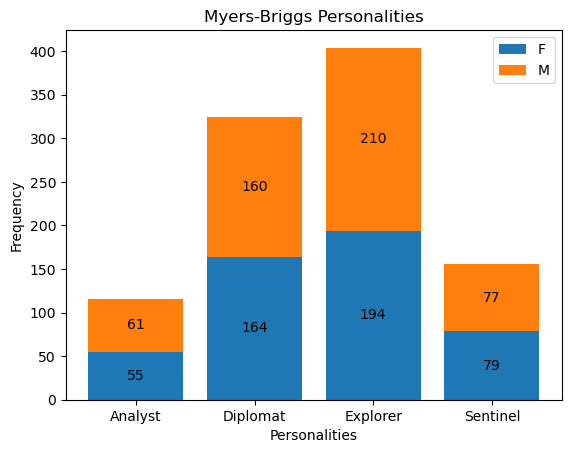

In [4]:
## A Stacked Column Chart
import matplotlib.pyplot as plt

# Plot.
fig, mb2 = plt.subplots()

# Gendered personality data.
f = np.array([x for x in cont_tab.iloc[0,:]][:4])
m = np.array([x for x in cont_tab.iloc[1,:]][:4])

# Personalities, for x labels.
pers_ = cont_tab.columns[:4].tolist()

# Bars.
mb2.bar(pers_, f)
mb2.bar(pers_, m,bottom=f)

# Get number labels for bars.
for c in mb2.containers:
    labels = [y.get_height() for y in c]
    mb2.bar_label(c, labels=labels, label_type='center')

mb2.legend(['F', 'M'])
mb2.set_ylabel('Frequency')
mb2.set_xlabel('Personalities')
mb2.set_title('Myers-Briggs Personalities')

plt.show()

In [5]:
""" EXAMPLE 2.2

An online retailer sent out a promotional discount via email. Is there
a relationship between a customer's location in the US and whether the
customer made a purchase with the discount?
"""
# Read in data.
promo = pd.read_csv('Promotion.csv', index_col=False)
promo.head(5)

,Email,Purchase,Location
0,1,yes,West
1,2,yes,Northeast
2,3,yes,Northeast
3,4,no,Midwest
4,5,no,Northeast


In [6]:
# Contingency table.
promo_ctable = pd.crosstab(promo['Location'],
                       promo['Purchase'], margins=True)
promo_ctable

Purchase,no,yes,All
Location,,,
Midwest,107,77,184
Northeast,41,102,143
South,24,130,154
West,18,101,119
All,190,410,600


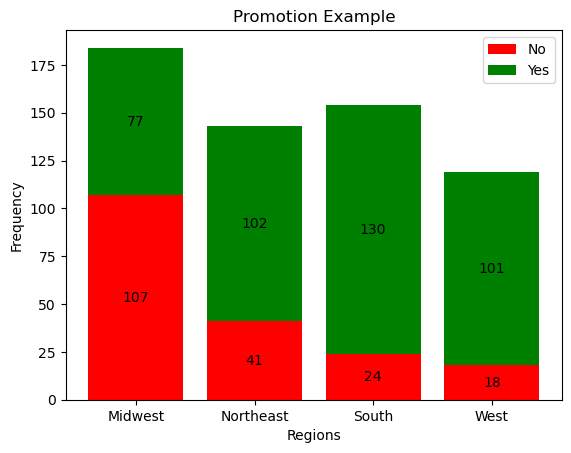

In [7]:
# Plot.
fig, pro_bar = plt.subplots()

# No / yes promo data.
no = np.array([x for x in promo_ctable['no']][:4])
yes = np.array([x for x in promo_ctable['yes']][:4])

# Location for x labels.
pers_ = promo_ctable.index[:4].tolist()

# Bars.
pro_bar.bar(pers_, no, color='red')
pro_bar.bar(pers_, yes,bottom=no, color='green')

# Get number labels for bars.
for c in pro_bar.containers:
    labels = [y.get_height() for y in c]
    pro_bar.bar_label(c, labels=labels, label_type='center')

pro_bar.legend(['No', 'Yes'])
pro_bar.set_ylabel('Frequency')
pro_bar.set_xlabel('Regions')
pro_bar.set_title('Promotion Example')

plt.show()